# Water Survey of Canada - Usage

This notebook demonstrates methods for accessing and processing data extracted from the HYDAT database. 


### Table of Contents

* [Reading Cached Data](#data): Reading the cached data sets.
* [Mapping WSC Stations](#mapping): Produce a map of WSC monitoring stations.
* [Plotting](#Plotting): Demonstration of how to access and plot data iw WSC_LEVELS and WSC_FLOWS.


<a id="Initialization"></a>
## Initialization

In [53]:
# Display graphics inline with the notebook
%matplotlib inline

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Modules to display images and data tables
from IPython.core.display import display

import seaborn as sns
sns.set_context('talk')

## Read Cached Data Files

In [54]:
WSC_STATIONS = pd.read_pickle('../data/WSC_STATIONS')
WSC_LEVELS = pd.read_pickle('../data/WSC_LEVELS')
WSC_FLOWS = pd.read_pickle('../data/WSC_FLOWS')

display(WSC_STATIONS['STATION_NAME'])

STATION_NUMBER
05PA001                     KETTLE RIVER ABOVE KETTLE FALLS
05PA003                 NAMAKAN LAKE ABOVE KETTLE FALLS DAM
05PA005                       NORTHERN LIGHT LAKE AT OUTLET
05PA006             NAMAKAN RIVER AT OUTLET OF LAC LA CROIX
05PA007                     CROOKED LAKE NEAR CURTAIN FALLS
05PA010                           FRENCH LAKE NEAR ATIKOKAN
05PA011                     LAC LA CROIX AT CAMPBELL'S CAMP
05PA012                          BASSWOOD RIVER NEAR WINTON
05PA013                     NAMAKAN LAKE AT SQUIRREL ISLAND
05PB001                           SEINE RIVER NEAR LA SEINE
05PB002                 LITTLE TURTLE LAKE NEAR MINE CENTRE
05PB003                 MANITOU RIVER ABOVE DEVIL'S CASCADE
05PB004                 FOOTPRINT RIVER AT RAINY LAKE FALLS
05PB007                        RAINY LAKE NEAR FORT FRANCES
05PB009    SEINE RIVER AT STURGEON FALLS GENERATING STATION
05PB012                 LAC DES MILLE LACS ABOVE OUTLET DAM
05PB014                  

<a id="Monitoring Stations"></a>
## Monitoring Stations in the Rainy River Watershed

The following cell creates a pandas dataframe of monitoring stations from the STATIONS.csv table extracted from the HYDAT database. The extaction searches for all stations with a specified region bounded by latitude and longitudes.

For reference, this is a map of the [Rainy River drainage](http://www.ijc.org/files/tinymce/uploaded/rl_basinmap.pdf) basin available from the International Joint Commission. 

<p align='center'><img src='../images/75242923.png' width = 480></p>

<a id='mapping'></a>
### Mapping WSC Stations

The following function maps a list of stations identified by their station numbers. In extracts latitude and longitude from the STATIONS table, then calls the google maps web api to create a map image.

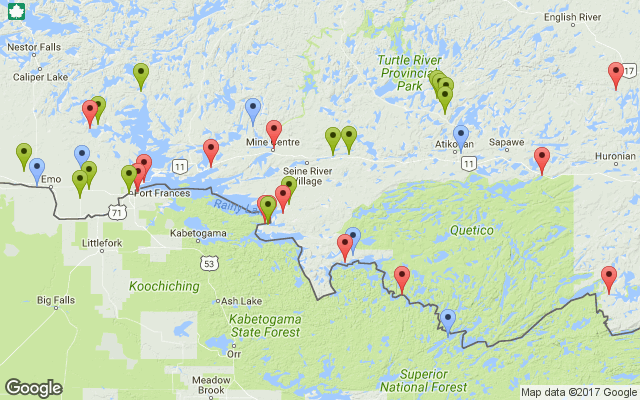

In [55]:
def mapWSC(stationList,zoom=8):
    # returns a .png map image        
    locs = ["{0},{1}".format(WSC_STATIONS.ix[s,'LATITUDE'], WSC_STATIONS.ix[s,'LONGITUDE']) \
             for s in stationList]
    
    flows = [s for s in stationList if WSC_STATIONS.ix[s,'Flow'] == True]
    levels = [s for s in stationList if WSC_STATIONS.ix[s,'Level'] == True]
    
    rSet = set(levels).difference(set(flows))
    gSet = set(flows).difference(set(levels))
    bSet = set(levels).intersection(set(flows))

    google_maps_url = \
        "https://maps.googleapis.com/maps/api/staticmap?" + \
        "size=640x400" + \
        "&zoom={:d}".format(zoom) + \
        "&maptype=terrain" + \
        "&markers=color:red%7Csize:mid%7C" + \
        "|".join(["{0},{1}".format(WSC_STATIONS.ix[s,'LATITUDE'], \
                                   WSC_STATIONS.ix[s,'LONGITUDE']) for s in rSet]) + \
        "&markers=color:green%7Csize:mid%7C" + \
        "|".join(["{0},{1}".format(WSC_STATIONS.ix[s,'LATITUDE'], \
                                   WSC_STATIONS.ix[s,'LONGITUDE']) for s in gSet]) + \
        "&markers=color:blue%7Csize:mid%7C" + \
        "|".join(["{0},{1}".format(WSC_STATIONS.ix[s,'LATITUDE'], \
                                   WSC_STATIONS.ix[s,'LONGITUDE']) for s in bSet])

    return Image(requests.get(google_maps_url).content)


display(mapWSC(WSC_STATIONS.index))

## Use Cases

### Example: Station Data

The HYDAT database is a collection of data associated with monitoring stations located throughout Canada. The STATIONS table contains a list of stations and attributes, including the latitude and longitude of their position. As an example, here we list attributes for 05PB007, a station monitoring the level of Rainy Lake near Fort Frances, Ontario.

In [56]:
display(WSC_STATIONS.ix['05PB007'])
display(WSC_STATIONS.ix['05PC018'])

STATION_NAME            RAINY LAKE NEAR FORT FRANCES
PROV_TERR_STATE_LOC                               ON
REGIONAL_OFFICE_ID                                 5
HYD_STATUS                                         A
SED_STATUS                                       NaN
LATITUDE                                     48.6491
LONGITUDE                                   -93.3207
DRAINAGE_AREA_GROSS                              NaN
DRAINAGE_AREA_EFFECT                             NaN
RHBN                                               0
REAL_TIME                                          1
CONTRIBUTOR_ID                                   647
OPERATOR_ID                                      647
DATUM_ID                                         100
Level                                           True
Flow                                                
Name: 05PB007, dtype: object

STATION_NAME            RAINY RIVER AT MANITOU RAPIDS
PROV_TERR_STATE_LOC                                ON
REGIONAL_OFFICE_ID                                  5
HYD_STATUS                                          A
SED_STATUS                                        NaN
LATITUDE                                      48.6345
LONGITUDE                                    -93.9134
DRAINAGE_AREA_GROSS                             50200
DRAINAGE_AREA_EFFECT                              NaN
RHBN                                                0
REAL_TIME                                           0
CONTRIBUTOR_ID                                    647
OPERATOR_ID                                       600
DATUM_ID                                           10
Level                                            True
Flow                                             True
Name: 05PC018, dtype: object

### Example: Plotting level information

STATION_NAME            NAMAKAN LAKE ABOVE KETTLE FALLS DAM
PROV_TERR_STATE_LOC                                      ON
REGIONAL_OFFICE_ID                                        5
HYD_STATUS                                                D
SED_STATUS                                              NaN
LATITUDE                                               48.5
LONGITUDE                                          -92.6389
DRAINAGE_AREA_GROSS                                     NaN
DRAINAGE_AREA_EFFECT                                    NaN
RHBN                                                      0
REAL_TIME                                                 0
CONTRIBUTOR_ID                                          647
OPERATOR_ID                                             647
DATUM_ID                                                100
Level                                                  True
Flow                                                       
Name: 05PA003, dtype: object

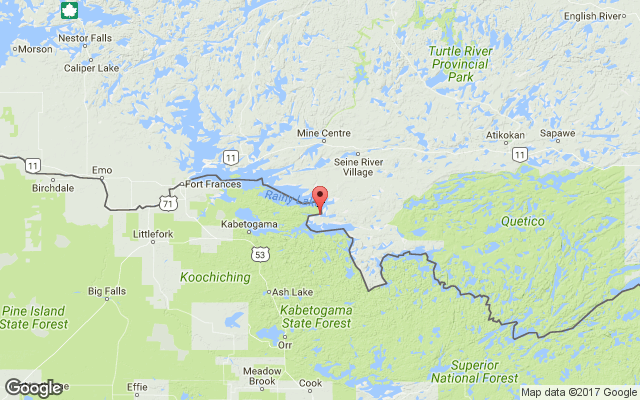

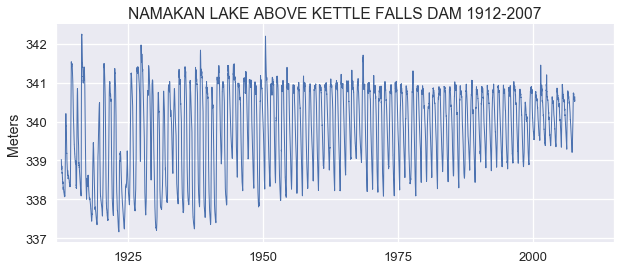

In [57]:
s = '05PA003'
display(WSC_STATIONS.ix[s])

display(mapWSC([s]))
plt.figure(figsize=(10,4))
WSC_LEVELS[s].plot(lw=1)
yrA = str(WSC_LEVELS[s].dropna().index[0].year)
yrB = str(WSC_LEVELS[s].dropna().index[-1].year)
plt.title(WSC_STATIONS.ix[s,'STATION_NAME'] + ' ' + yrA + '-' + yrB) 
plt.ylabel('Meters')

### Example: Plotting flow information

STATION_NAME            RAINY RIVER AT FORT FRANCES
PROV_TERR_STATE_LOC                              ON
REGIONAL_OFFICE_ID                                5
HYD_STATUS                                        A
SED_STATUS                                      NaN
LATITUDE                                    48.6085
LONGITUDE                                  -93.4034
DRAINAGE_AREA_GROSS                           38600
DRAINAGE_AREA_EFFECT                            NaN
RHBN                                              0
REAL_TIME                                         0
CONTRIBUTOR_ID                                  647
OPERATOR_ID                                       5
DATUM_ID                                        100
Level                                              
Flow                                           True
Name: 05PC019, dtype: object

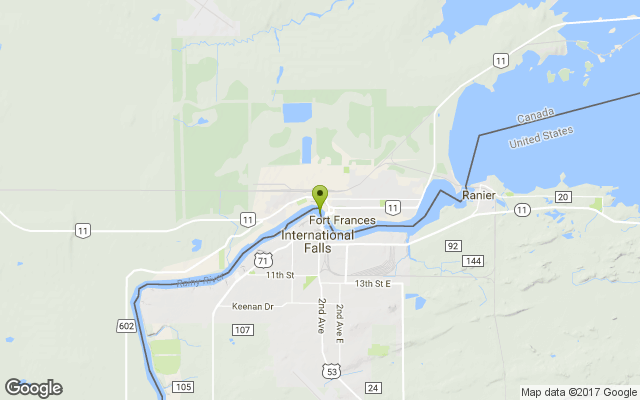

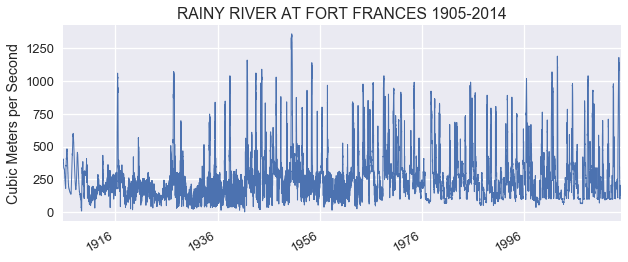

In [58]:
s = '05PC019'
display(WSC_STATIONS.ix[s])

display(mapWSC([s],12))
plt.figure(figsize=(10,4))
WSC_FLOWS[s].dropna().plot(lw=1)
yrA = str(WSC_FLOWS[s].dropna().index[0].year)
yrB = str(WSC_FLOWS[s].dropna().index[-1].year)
plt.title(WSC_STATIONS.ix[s,'STATION_NAME'] + ' ' + yrA + '-' + yrB) 
plt.ylabel('Cubic Meters per Second')

### Example: Comparing Levels on Rainy and Namakan Lakes

Use of this function is demonstrated by reading and plotting the history of lake levels for Rainy and Namakan Lakes.

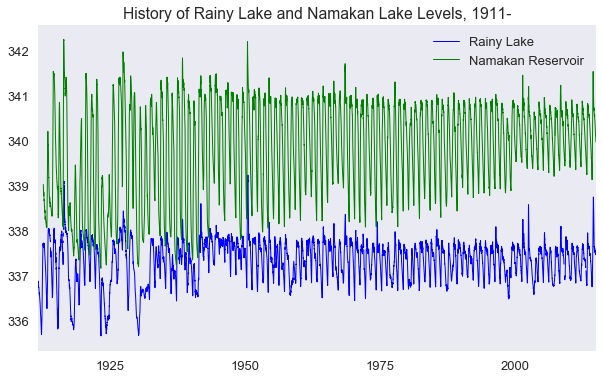

In [59]:
plt.figure(figsize=(10,6))
WSC_LEVELS['05PB007'].plot(color='blue',lw=1)   # RL at Fort Frances
WSC_LEVELS['05PA003'].plot(color='green',lw=1)  # NL at Kettle Falls
WSC_LEVELS['05PA013'].plot(color='green',lw=1)  # NL at Squirrel Island

plt.legend(['Rainy Lake','Namakan Reservoir']);
plt.title('History of Rainy Lake and Namakan Lake Levels, 1911-')
plt.grid()

### Example: What was the highest water events on Rainy Lake?

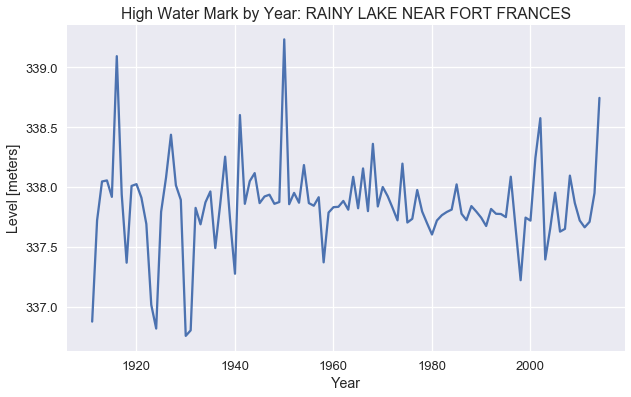

In [92]:
s = '05PB007'
LEVELS = WSC_LEVELS[s]

high_levels = np.asarray([[yr,r.max()] for (yr,r) in LEVELS.groupby(LEVELS.index.year)])
yr,h = high_levels.transpose()

plt.figure(figsize=(10,6))
plt.plot(yr,h)
plt.xlabel('Year')
plt.ylabel('Level [meters]')
plt.title('High Water Mark by Year: ' + WSC_STATIONS['STATION_NAME'].ix[s])

### Example: Distribution of Flows on Rainy River

The use of this function is demonstrated by creating a historgram of flows on Rainy River in the period 

In [61]:
RR = WSC_FLOWS['05PC019']
RM = WSC_FLOWS['05PC018']

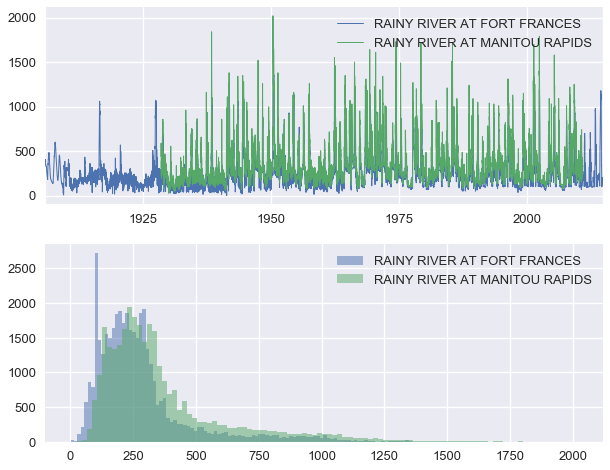

In [75]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)

RR.plot(lw=1)
RM.plot(lw=1)
plt.legend([WSC_STATIONS.ix[RR.name,'STATION_NAME'],WSC_STATIONS.ix[RM.name,'STATION_NAME']])

plt.subplot(2,1,2)

RR.hist(bins=100,lw=1,alpha=0.5)
RM.hist(bins=100,lw=1,alpha=0.5)

plt.legend([WSC_STATIONS.ix[RR.name,'STATION_NAME'],WSC_STATIONS.ix[RM.name,'STATION_NAME']])

### Example: Ungaged Inflows to Rainy River

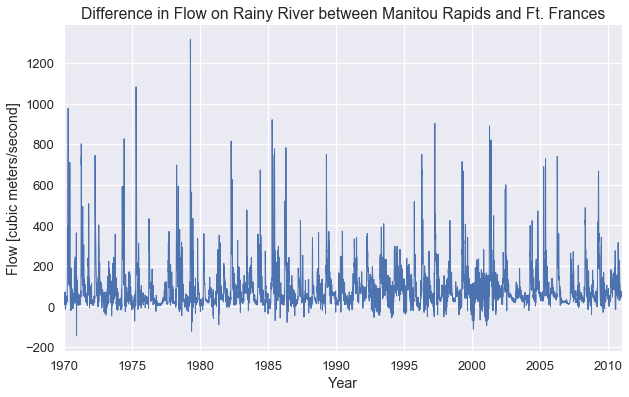

In [72]:
A = '05PC019'   # Rainy River at Ft. Frances
B = '05PC018'   # Rainy River at Manitou Rapids

FLOW = (WSC_FLOWS[B] - WSC_FLOWS[A]).dropna()

plt.figure(figsize=(10,6))
FLOW['1970':].plot(lw=1)

plt.xlabel('Year')
plt.ylabel('Flow [cubic meters/second]')
plt.title('Difference in Flow on Rainy River between Manitou Rapids and Ft. Frances')

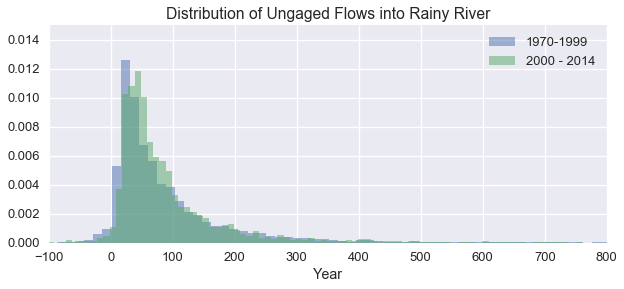

In [77]:
plt.figure(figsize=(10,4))

FLOW['1970':'1999'].hist(bins=100,normed=1,alpha=0.5)
plt.ylim([0,.015])
plt.xlim([-100,800])

FLOW['2000':].hist(bins=100,normed=1,alpha=0.5)
plt.ylim([0,.015])
plt.xlim([-100,800])

plt.title('Distribution of Ungaged Flows into Rainy River')
plt.xlabel('Year')
plt.legend(['1970-1999','2000 - 2014'])

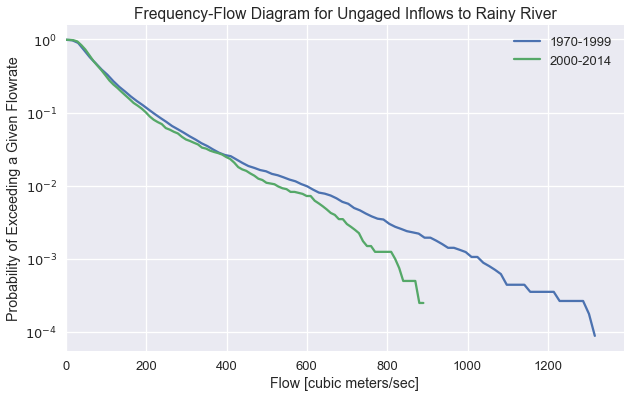

In [85]:
plt.figure(figsize=(10,6))

FLOW = WSC_FLOWS[B] - WSC_FLOWS[A]

hist,bins = np.histogram([q for q in FLOW['1970':'2000'] if pd.notnull(q)],bins = 100)
chist = np.cumsum(hist[::-1])[::-1]/float(sum(hist))
plt.semilogy(bins[1:],chist)

hist,bins = np.histogram([q for q in FLOW['2000':] if pd.notnull(q)],bins = 100)
chist = np.cumsum(hist[::-1])[::-1]/float(sum(hist))
plt.semilogy(bins[1:],chist)
plt.xlim([0,plt.xlim()[1]])

plt.xlim([0,plt.xlim()[1]])

plt.legend(['1970-1999','2000-2014'])

plt.ylabel('Probability of Exceeding a Given Flowrate')
plt.xlabel('Flow [cubic meters/sec]')
plt.title('Frequency-Flow Diagram for Ungaged Inflows to Rainy River')

### Example: Flow-Frequency Behaviors for State-of-Nature Streams in the Rainy River Watershed

05PA006NAMAKAN RIVER AT OUTLET OF LAC LA CROIX           19212014
05PA012BASSWOOD RIVER NEAR WINTON                        19242010
05PB001SEINE RIVER NEAR LA SEINE                         19141926
05PB003MANITOU RIVER ABOVE DEVIL'S CASCADE               19141915
05PB004FOOTPRINT RIVER AT RAINY LAKE FALLS               19141916
05PB009SEINE RIVER AT STURGEON FALLS GENERATING STATION  19632014
05PB014TURTLE RIVER NEAR MINE CENTRE                     19142014
05PB015PIPESTONE RIVER ABOVE RAINY LAKE                  19631998
05PB018ATIKOKAN RIVER AT ATIKOKAN                        19782014
05PB019NORTHEAST TRIBUTARY TO DASHWA LAKE NEAR ATIKOKAN  19861986
05PB020EASTERN TRIBUTARY TO DASHWA LAKE NEAR ATIKOKAN    19861986
05PB021EYE RIVER NEAR HARDTACK LAKE NORTH OF ATIKOKAN    19851994
05PB022EYE RIVER NEAR COULSON LAKE NORTH OF ATIKOKAN     19851993
05PC009LA VALLEE RIVER AT LA VALLEE                      19521959
05PC010STURGEON RIVER NEAR BARWICK                       19521986
05PC016LA 

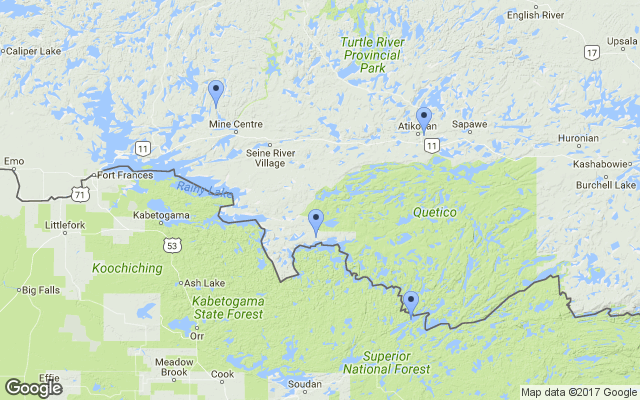

05PA006NAMAKAN RIVER AT OUTLET OF LAC LA CROIX           19212014
05PA012BASSWOOD RIVER NEAR WINTON                        19242010
05PB014TURTLE RIVER NEAR MINE CENTRE                     19142014
05PB018ATIKOKAN RIVER AT ATIKOKAN                        19782014


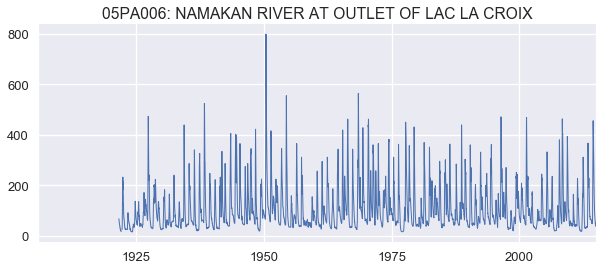

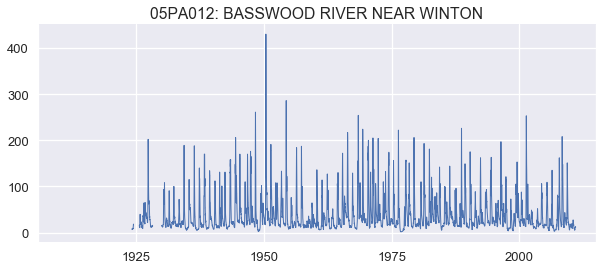

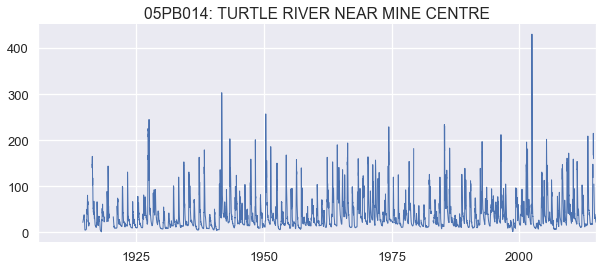

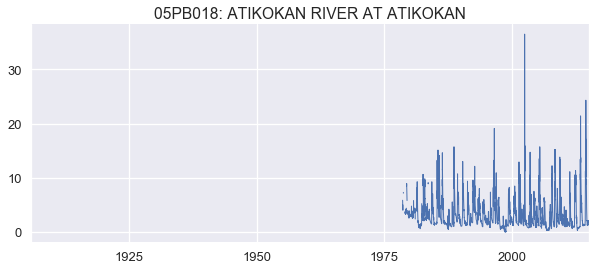

In [91]:
stationList = ['05PA006','05PA012','05PB001','05PB003','05PB004','05PB009',
               '05PB014','05PB015','05PB018','05PB019','05PB020','05PB021',
               '05PB022','05PC009','05PC010','05PC016','05PC022']

for s in stationList:
    print(s,end='')
    print("{0:50s}".format(WSC_STATIONS.loc[s]['STATION_NAME']),end='')
    print(WSC_FLOWS[s].dropna().index[0].year,end='')
    print(WSC_FLOWS[s].dropna().index[-1].year)
    
stationList = ['05PA006','05PA012','05PB014','05PB018']
display(mapWSC(stationList))

for s in stationList:
    print(s,end='')
    print("{0:50s}".format(WSC_STATIONS.loc[s]['STATION_NAME']),end='')
    print(WSC_FLOWS[s].dropna().index[0].year,end='')
    print(WSC_FLOWS[s].dropna().index[-1].year)

for s in stationList:
    plt.figure(figsize=(10,4))
    WSC_FLOWS[s].plot(lw=1)
    plt.title(s + ': ' + WSC_STATIONS.loc[s]['STATION_NAME'])

STATION_NAME            NAMAKAN RIVER AT OUTLET OF LAC LA CROIX
PROV_TERR_STATE_LOC                                          ON
REGIONAL_OFFICE_ID                                            5
HYD_STATUS                                                    A
SED_STATUS                                                  NaN
LATITUDE                                                48.3826
LONGITUDE                                              -92.1763
DRAINAGE_AREA_GROSS                                       13400
DRAINAGE_AREA_EFFECT                                        NaN
RHBN                                                          0
REAL_TIME                                                     1
CONTRIBUTOR_ID                                              647
OPERATOR_ID                                                 647
DATUM_ID                                                     95
Level                                                      True
Flow                                    

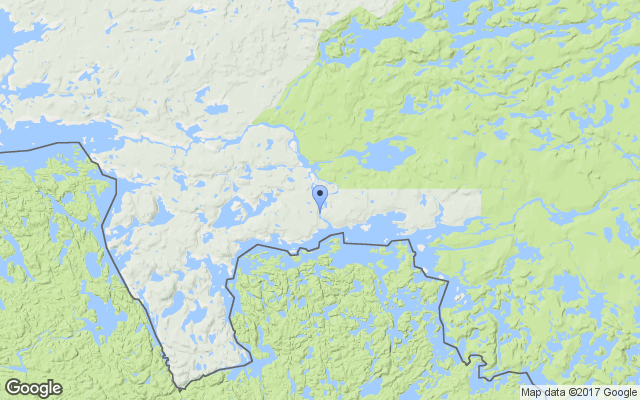

STATION_NAME            BASSWOOD RIVER NEAR WINTON
PROV_TERR_STATE_LOC                             ON
REGIONAL_OFFICE_ID                               5
HYD_STATUS                                       A
SED_STATUS                                     NaN
LATITUDE                                   48.0826
LONGITUDE                                 -91.6512
DRAINAGE_AREA_GROSS                           4510
DRAINAGE_AREA_EFFECT                           NaN
RHBN                                             0
REAL_TIME                                        0
CONTRIBUTOR_ID                                 647
OPERATOR_ID                                    600
DATUM_ID                                        10
Level                                         True
Flow                                          True
Name: 05PA012, dtype: object

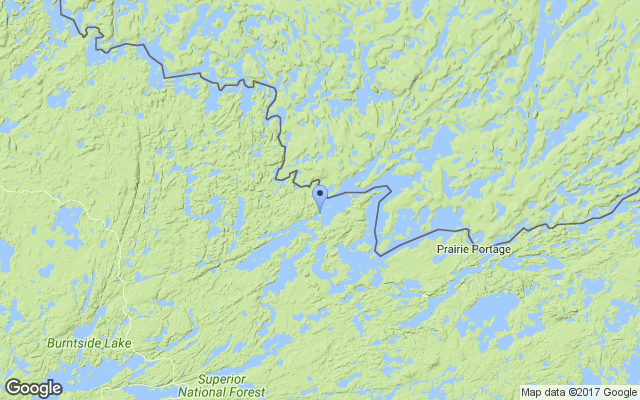

STATION_NAME            TURTLE RIVER NEAR MINE CENTRE
PROV_TERR_STATE_LOC                                ON
REGIONAL_OFFICE_ID                                  5
HYD_STATUS                                          A
SED_STATUS                                        NaN
LATITUDE                                      48.8502
LONGITUDE                                    -92.7238
DRAINAGE_AREA_GROSS                           4767.74
DRAINAGE_AREA_EFFECT                              NaN
RHBN                                                1
REAL_TIME                                           1
CONTRIBUTOR_ID                                    647
OPERATOR_ID                                       647
DATUM_ID                                           10
Level                                            True
Flow                                             True
Name: 05PB014, dtype: object

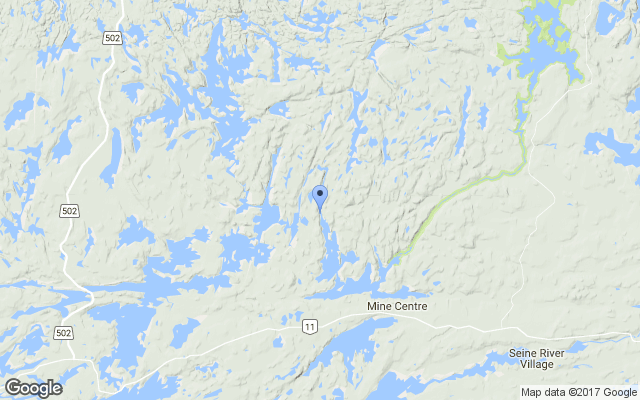

STATION_NAME            ATIKOKAN RIVER AT ATIKOKAN
PROV_TERR_STATE_LOC                             ON
REGIONAL_OFFICE_ID                               5
HYD_STATUS                                       A
SED_STATUS                                     NaN
LATITUDE                                    48.752
LONGITUDE                                 -91.5841
DRAINAGE_AREA_GROSS                         358.02
DRAINAGE_AREA_EFFECT                           NaN
RHBN                                             0
REAL_TIME                                        1
CONTRIBUTOR_ID                                 480
OPERATOR_ID                                    647
DATUM_ID                                       129
Level                                         True
Flow                                          True
Name: 05PB018, dtype: object

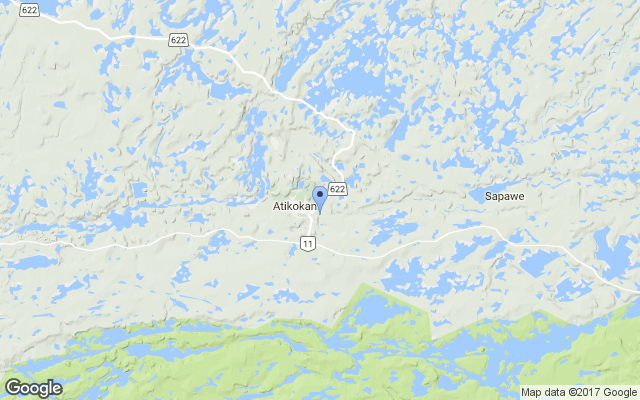

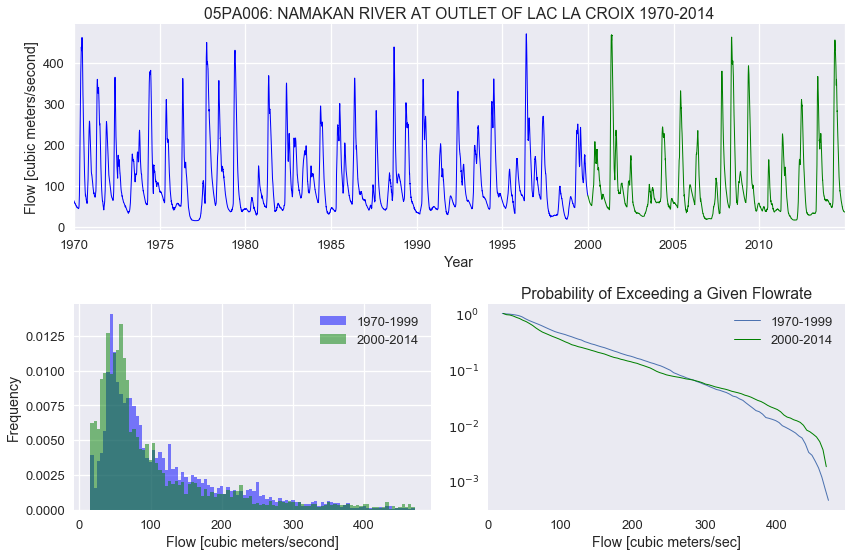

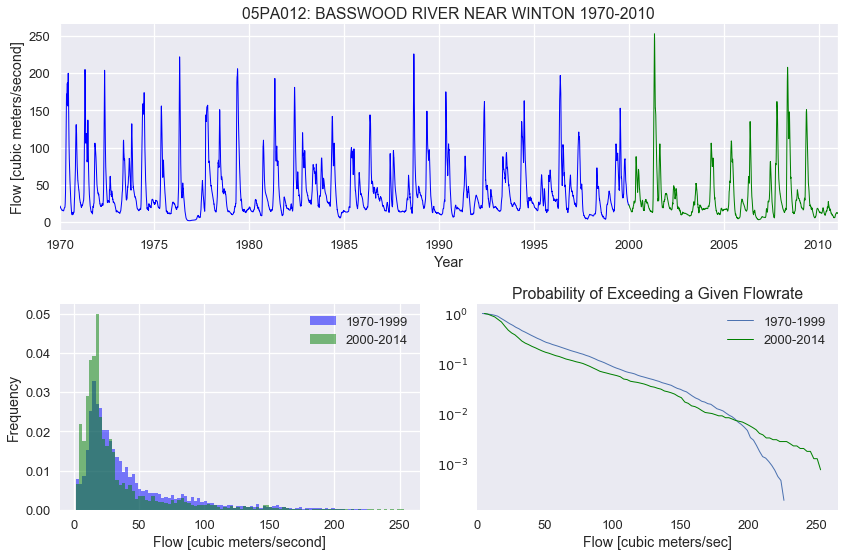

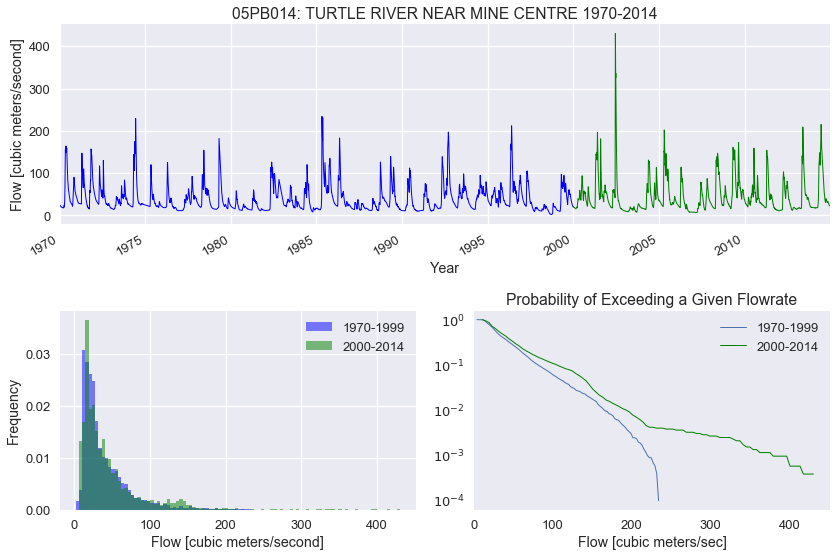

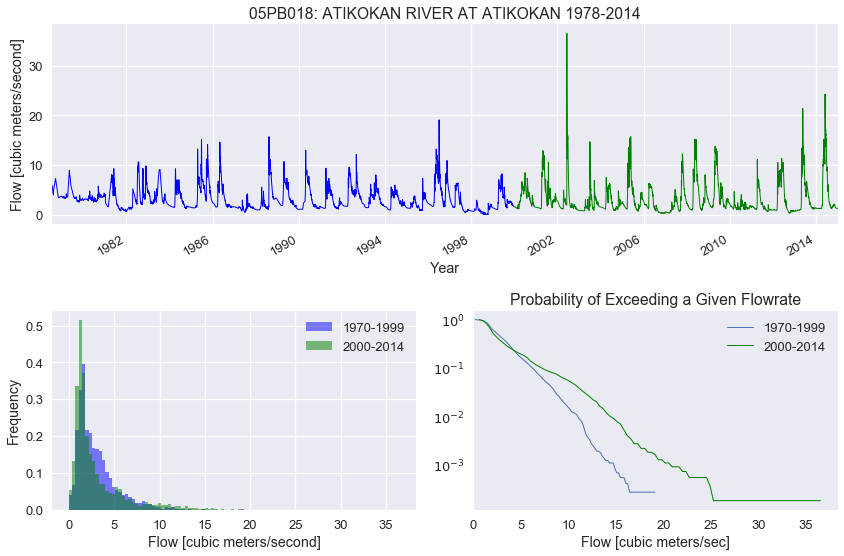

In [109]:
def WSC_FlowFrequency(s):
    
    display(WSC_STATIONS.ix[s])
    display(mapWSC([s],10))

    FLOW = WSC_FLOWS[s]['1970':].dropna()
    # select period of year
    FLOW = FLOW.ix[FLOW.index.dayofyear >= 1] # 135]
    FLOW = FLOW.ix[FLOW.index.dayofyear <= 366] # 196]

    # show data
    plt.figure(figsize=(12,8))
    plt.subplot2grid((2,2),(0,0),colspan=2)
    FLOW[:'1999'].plot(color='b',lw=1)
    
    FLOW['2000':].plot(color='g',lw=1)    
    plt.xlabel('Year')
    plt.ylabel('Flow [cubic meters/second]')
    plt.title(s + ': ' + WSC_STATIONS.ix[s,'STATION_NAME'] + 
              ' ' + str(FLOW.index[0].year) + '-' + str(FLOW.index[-1].year))
    
    # histogram distribution of flows
    plt.subplot2grid((2,2),(1,0))

    hist,bins = np.histogram(FLOW,bins=100)
    FLOW['1970':'1999'].hist(bins=bins,normed=1, color='b', alpha=0.5,lw=1)
    FLOW['2000':].hist(bins=bins,normed=1,color='g', alpha=0.5,lw=1)
    plt.ylabel('Frequency')
    plt.xlabel('Flow [cubic meters/second]')
    plt.legend(['1970-1999','2000-2014'])
    plt.tight_layout()
    
    # flow-frequency plots
    plt.subplot2grid((2,2),(1,1))

    hist,bins = np.histogram(FLOW['1970':'1999'],bins = 100)
    chist = np.cumsum(hist[::-1])[::-1]/float(sum(hist))
    plt.semilogy(bins[1:],chist,lw=1)
    hist,bins = np.histogram(FLOW['2000':],bins = 100)
    chist = np.cumsum(hist[::-1])[::-1]/float(sum(hist))
    plt.semilogy(bins[1:],chist,color='g',lw=1)
    plt.xlim([0,plt.xlim()[1]])
    plt.legend(['1970-1999','2000-2014'])
    plt.title('Probability of Exceeding a Given Flowrate')
    plt.xlabel('Flow [cubic meters/sec]')

    plt.grid()
    plt.tight_layout()
    
    fname = '../images/FlowFrequency_' + s + '.png'
    plt.savefig(fname)
    !convert $fname -trim $fname

for s in stationList:
    WSC_FlowFrequency(s)

### Annual flows on Rainy River

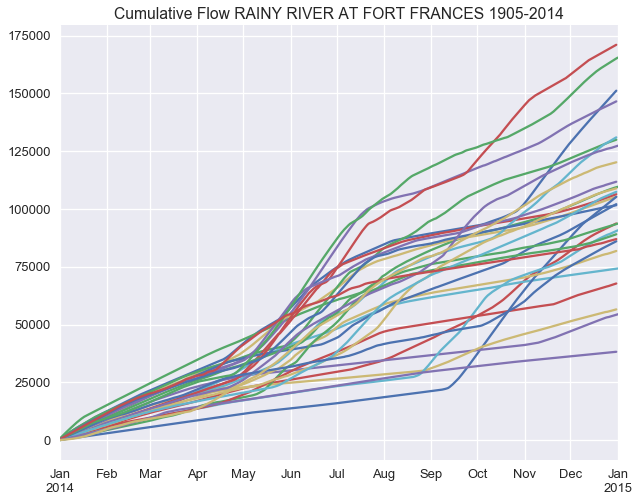

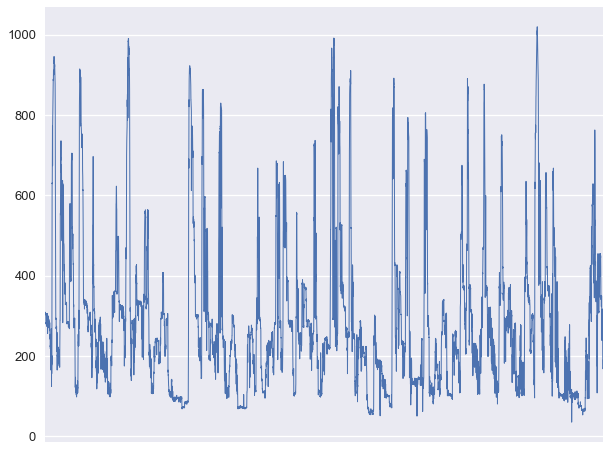

In [115]:
s='05PC019'
FLOW = WSC_FLOWS[s]

plt.figure(figsize=(10,8))
plt.subplot(1,1,1)

yrA = str(WSC_FLOWS[s].dropna().index[0].year)
yrB = str(WSC_FLOWS[s].dropna().index[-1].year)
plt.title('Cumulative Flow ' + WSC_STATIONS.ix[s,'STATION_NAME']
          + ' ' + str(WSC_FLOWS[s].dropna().index[0].year) 
          + '-' + str(WSC_FLOWS[s].dropna().index[-1].year)) 

for (yr,r) in FLOW['1971':'1999'].groupby(FLOW['1971':'1999'].index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.cumsum().plot()

plt.figure(figsize=(10,8))
FLOW['1970':'1999'].plot(lw=1)
    

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#fname = img + 'RuleCurvePerformance1970-1999.png'

#plt.savefig(fname)
#!convert $fname -trim $fname


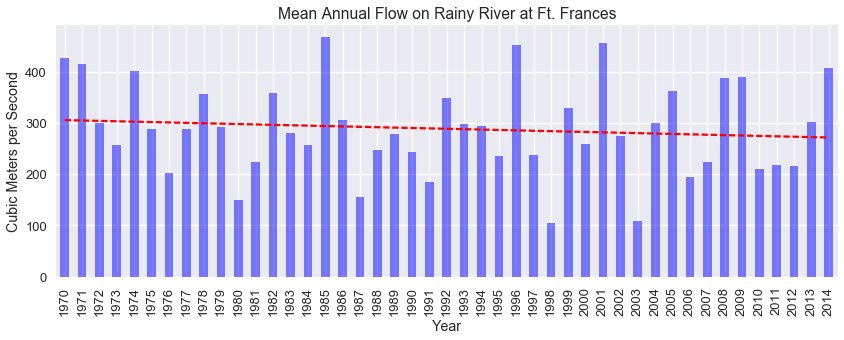

In [112]:
plt.figure(figsize=(12,5))
F = FLOW['1970':].groupby(FLOW['1970':].index.year).mean()

import statsmodels.api as sm

x = F.index
y = F.values

x = sm.add_constant(x)
est = sm.OLS(y,x).fit()
est.summary()

ypred = est.params[0] + F.index*est.params[1]

ax = F.plot(kind='bar',color='b',alpha=0.5)
ax.plot(ax.get_xticks(),ypred,'r--')

plt.title('Mean Annual Flow on Rainy River at Ft. Frances')
plt.xlabel('Year')
plt.ylabel('Cubic Meters per Second')

plt.tight_layout()

In [116]:
regressors = sm.tools.tools.add_constant(x)
r = sm.OLS(y,regressors).fit()

print r.summary()

SyntaxError: invalid syntax (<ipython-input-116-a9361de2d530>, line 4)

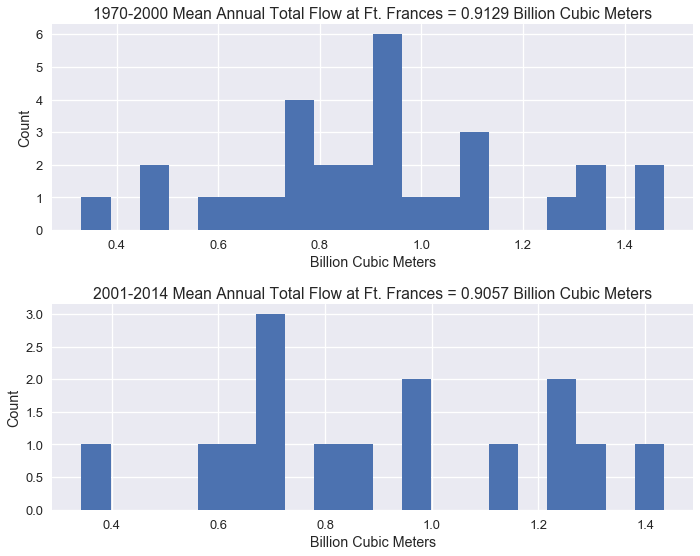

In [104]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)

A = FLOW['1970':'1999']
B = FLOW['2000':]

totalflow = 24*3600*A.groupby(A.index.year).sum()/10e9
totalflow.hist(bins=20)
plt.title('1970-2000 Mean Annual Total Flow at Ft. Frances = ' + "{:5.4f}".format(totalflow.mean()) + ' Billion Cubic Meters')
plt.xlabel('Billion Cubic Meters')
plt.ylabel('Count')

plt.subplot(2,1,2)
totalflow = 24*3600*B.groupby(B.index.year).sum()/10e9
totalflow.hist(bins=20)
plt.title('2001-2014 Mean Annual Total Flow at Ft. Frances = ' + "{:5.4f}".format(totalflow.mean()) + ' Billion Cubic Meters')
plt.xlabel('Billion Cubic Meters')
plt.ylabel('Count')

plt.tight_layout()

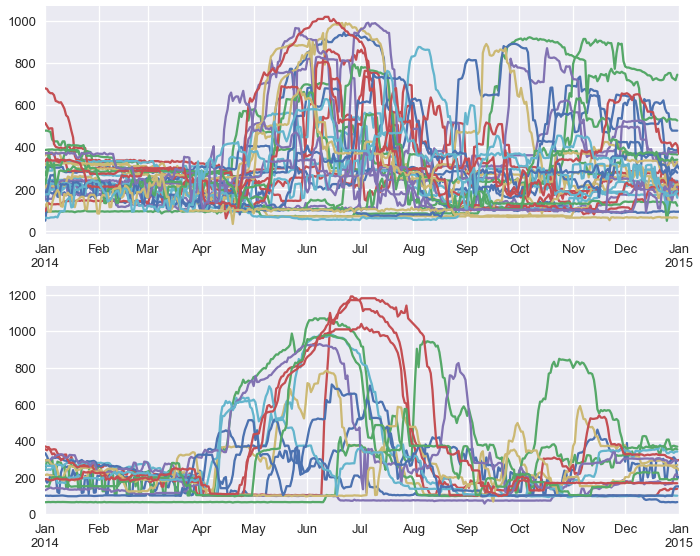

In [117]:
plt.figure(figsize=(10,8))

A = FLOW['1970':'1999']
B = FLOW['2000':]

plt.subplot(2,1,1)

for (yr,r) in A.groupby(A.index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.plot()
    
plt.subplot(2,1,2)

for (yr,r) in B.groupby(B.index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.plot()

plt.tight_layout()

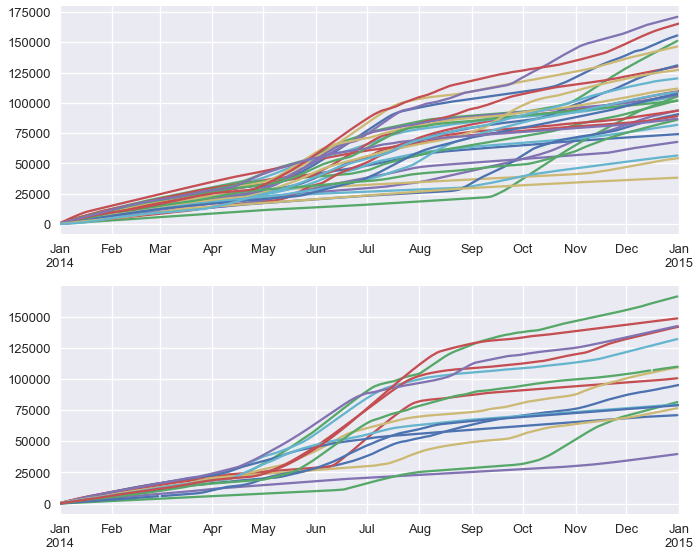

In [118]:
plt.figure(figsize=(10,8))

A = FLOW['1970':'1999']
B = FLOW['2000':]

plt.subplot(2,1,1)

for (yr,r) in A.groupby(A.index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.cumsum().plot()
    
plt.subplot(2,1,2)

for (yr,r) in B.groupby(B.index.year):
    shift = datetime.datetime(2014,1,1) - datetime.datetime(yr,1,1)
    r = r.tshift(shift.days)
    r.cumsum().plot()

plt.tight_layout()